In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import KFold
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import pickle
%matplotlib inline

In [2]:
#Read Data
data = pd.read_csv('../../SynData/data/GeneratedData.csv')
#data = pd.read_csv('../../RealData/RealData_Small.csv')



In [3]:
#General data info
data.head()

,Unnamed: 0,CPU,throughput
0,0,2.746560,194.447920
1,1,6.052445,288.489753
2,2,4.312178,247.764920
3,3,5.657870,274.500445
4,4,0.276564,37.136230


,Unnamed: 0,CPU,throughput
0,0,2.746560,194.447920
1,1,6.052445,288.489753
2,2,4.312178,247.764920
3,3,5.657870,274.500445
4,4,0.276564,37.136230


In [4]:
data.describe()

,Unnamed: 0,CPU,throughput
count,1000.000000,1000.000000,1000.000000
mean,499.500000,5.055952,243.497049
std,288.819436,2.865645,85.434593
min,0.000000,0.003582,0.537530
25%,249.750000,2.677284,192.695525
50%,499.500000,4.988130,263.943580
75%,749.250000,7.540200,314.262567
max,999.000000,9.982265,354.731051


,Unnamed: 0,CPU,throughput
count,1000.000000,1000.000000,1000.000000
mean,499.500000,5.055952,243.497049
std,288.819436,2.865645,85.434593
min,0.000000,0.003582,0.537530
25%,249.750000,2.677284,192.695525
50%,499.500000,4.988130,263.943580
75%,749.250000,7.540200,314.262567
max,999.000000,9.982265,354.731051


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Unnamed: 0    1000 non-null int64
CPU           1000 non-null float64
throughput    1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 23.5 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
Unnamed: 0    1000 non-null int64
CPU           1000 non-null float64
throughput    1000 non-null float64
dtypes: float64(2), int64(1)
memory usage: 23.5 KB


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


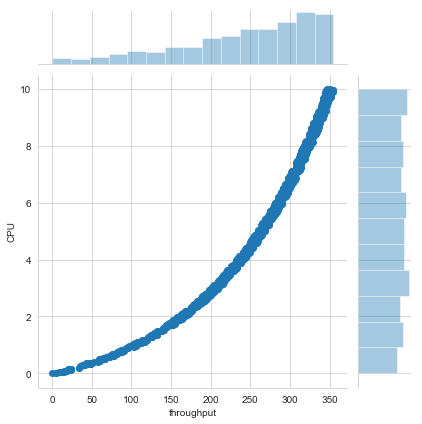

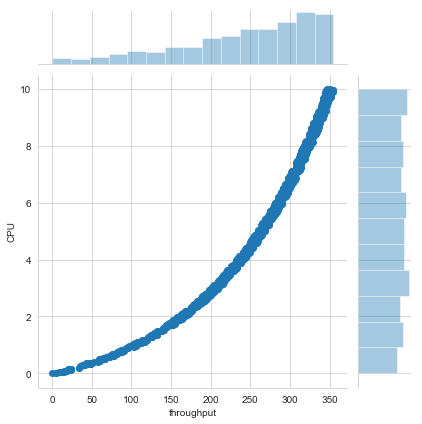

In [6]:
sns.set_style('whitegrid')
sns.jointplot(x=data['throughput'],y=data['CPU'],kind="scatter")


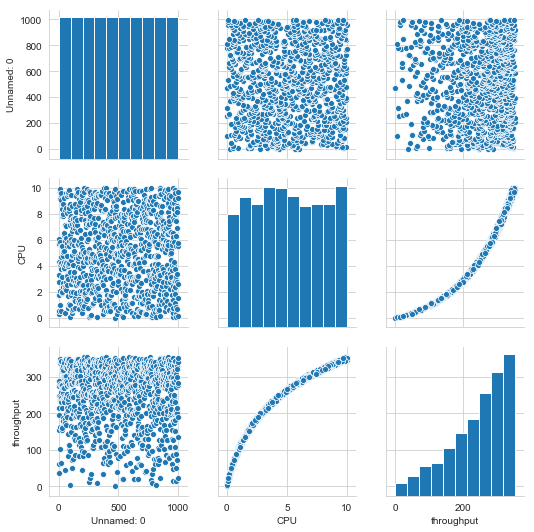

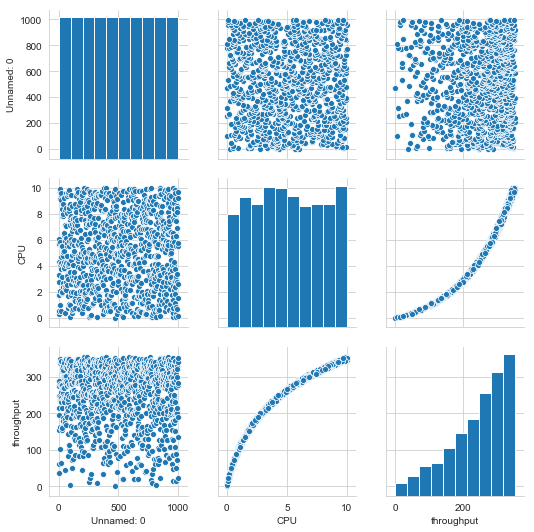

In [7]:
sns.pairplot(data)


In [8]:
data['throughput'].corr(data['CPU'])


0.9595509450961793

0.9595509450961793

In [9]:
datalm = data


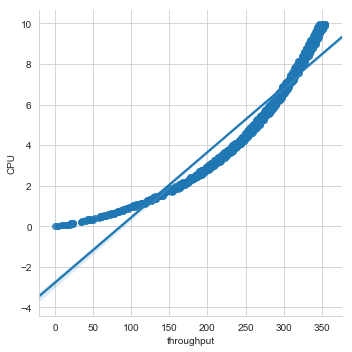

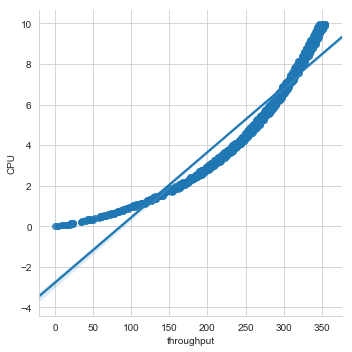

In [10]:
sns.lmplot(x='throughput',y='CPU',data=datalm)


In [11]:
#Training and Testing Data
X = data[['throughput']]
y = data['CPU']
scaler = MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(X)
n = len(X)
kf = KFold(n_splits=5)
fold = 0
for train_index, test_index in kf.split(X):
    fold += 1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
# Hyper parameter tuning using GridSearch CV
alphas = np.array([1,0.1,0.01,0.001,0.0001])
# create and fit a SDG regression model, testing each alpha
model = SGDRegressor(max_iter=10000, tol=1e-3, early_stopping=True)
grid = GridSearchCV(cv=10,estimator=model, param_grid=dict(alpha=alphas), n_jobs=-1)
grid.fit(X_train,y_train)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_.alpha)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10000,
       n_iter=None, n_iter_no_change=5, penalty='l2', power_t=0.25,
       random_state=None, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'alpha': array([1.e+00, 1.e-01, 1.e-02, 1.e-03, 1.e-04])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)
0.8978728883619147
0.0001
GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SGDRegressor(alpha=0.0001, average=False, early_stopping=True, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=10000,
       n_iter=None, n_i

In [12]:
#Test data prediction
prediction = grid.predict(X_test)
y_test = np.array(list(y_test))
prediction= np.array(prediction)
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': prediction.flatten()})
df

,Actual,Predicted
0,3.340055,4.429592
1,5.843651,6.151049
2,4.064791,5.120395
3,3.053561,4.003614
4,4.133810,5.023978
5,3.592894,4.732754
6,2.356314,3.368894
7,6.293143,6.477735
8,0.442129,0.063056
9,9.399679,7.785140


,Actual,Predicted
0,3.340055,4.429592
1,5.843651,6.151049
2,4.064791,5.120395
3,3.053561,4.003614
4,4.133810,5.023978
5,3.592894,4.732754
6,2.356314,3.368894
7,6.293143,6.477735
8,0.442129,0.063056
9,9.399679,7.785140


Text(0, 0.5, 'Predicted Y')

Text(0, 0.5, 'Predicted Y')

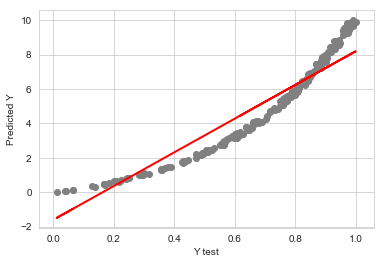

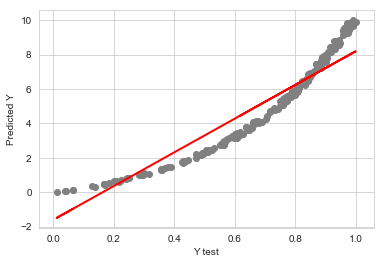

In [13]:
#Plot prediction
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, prediction, color='red', linewidth=2)
plt.xlabel("Y test")
plt.ylabel("Predicted Y")


MAE: 0.7676473561436984
MSE: 0.7970689130449685
RMSE: 0.8927871599910969
MAE: 0.7676473561436984
MSE: 0.7970689130449685
RMSE: 0.8927871599910969


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


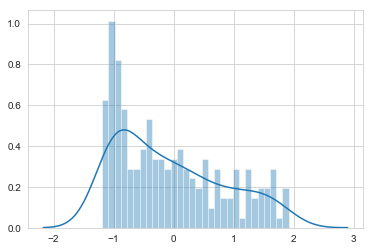

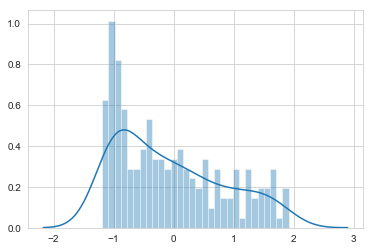

In [18]:
#Model Evaluation
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))


/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/usr/local/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


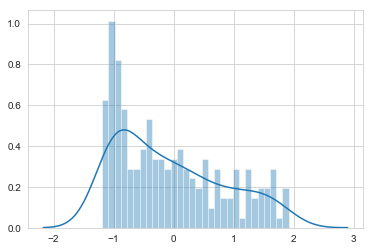

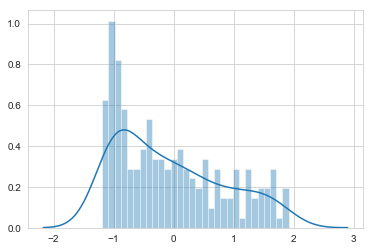

In [15]:
#Residuals
sns.distplot(y_test-prediction,bins=30)

In [16]:
# save the model to disk
filename = '../models/SGD_model.sav'
pickle.dump(grid, open(filename, 'wb'))

In [19]:
grid.predict([[0.2243476]])

array([0.59336652])

array([0.59336652])